#Airline Customer Value Analysis

##Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/python/day 23/flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


##Data Pre-Processing

###Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
nums= ['MEMBER_NO','FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum','Point_NotFlight']
df[nums].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [ ]:
category= ['FFP_DATE','FIRST_FLIGHT_DATE','GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY','LOAD_TIME','LAST_FLIGHT_DATE']
df[category].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


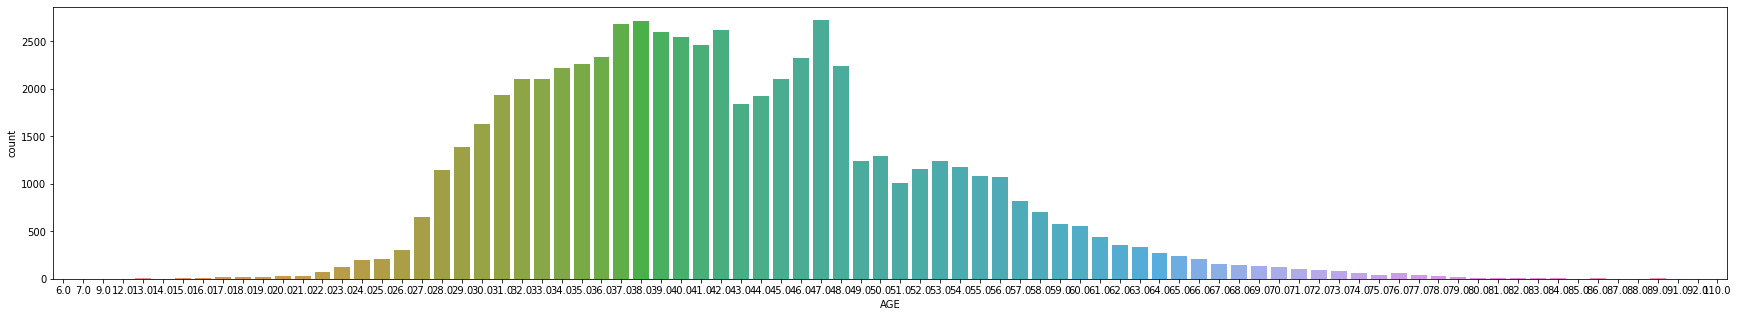

In [ ]:
plt.figure(figsize=(30,5))
sns.countplot(x="AGE", data=df)

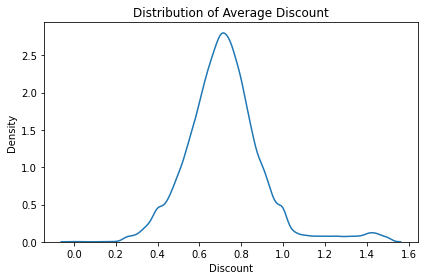

In [ ]:
ax = sns.kdeplot(x = 'avg_discount', data=df)
ax.set_title("Distribution of Average Discount")
ax.set_ylabel("Density")
ax.set_xlabel("Discount")
plt.tight_layout()

In [ ]:
#Drop discount>1
df = df[df['avg_discount']<=1]

###Duplicated Data and Missing Values

Duplicated Data

In [ ]:
df.duplicated().sum()

0

Missing Value

In [ ]:
data_null = df.isnull().sum().reset_index()
data_null.columns = ['feature','missing_value']
data_null['percentage'] = round((data_null['missing_value']/len(df))*100,2)
data_null = data_null.sort_values('percentage', ascending=False).reset_index(drop=True)
data_null = data_null[data_null['percentage']>0]
data_null

,feature,missing_value,percentage
0,WORK_PROVINCE,3019,5.03
1,WORK_CITY,2102,3.50
2,SUM_YR_1,542,0.90
3,AGE,389,0.65
4,SUM_YR_2,134,0.22
5,WORK_COUNTRY,23,0.04


In [ ]:
df['AGE'] = df['AGE'].fillna(df['AGE'].median())
df['SUM_YR_1'] = df['SUM_YR_1'].fillna(df['SUM_YR_1'].median())
df['SUM_YR_2'] = df['SUM_YR_2'].fillna(df['SUM_YR_2'].median())

In [ ]:
#some category data will be dropped
df = df.drop(['GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          60041 non-null  int64  
 1   FFP_DATE           60041 non-null  object 
 2   FIRST_FLIGHT_DATE  60041 non-null  object 
 3   FFP_TIER           60041 non-null  int64  
 4   AGE                60041 non-null  float64
 5   LOAD_TIME          60041 non-null  object 
 6   FLIGHT_COUNT       60041 non-null  int64  
 7   BP_SUM             60041 non-null  int64  
 8   SUM_YR_1           60041 non-null  float64
 9   SUM_YR_2           60041 non-null  float64
 10  SEG_KM_SUM         60041 non-null  int64  
 11  LAST_FLIGHT_DATE   60041 non-null  object 
 12  LAST_TO_END        60041 non-null  int64  
 13  AVG_INTERVAL       60041 non-null  float64
 14  MAX_INTERVAL       60041 non-null  int64  
 15  EXCHANGE_COUNT     60041 non-null  int64  
 16  avg_discount       600

Handling duplicated data and missing values done

###Outliers Handling

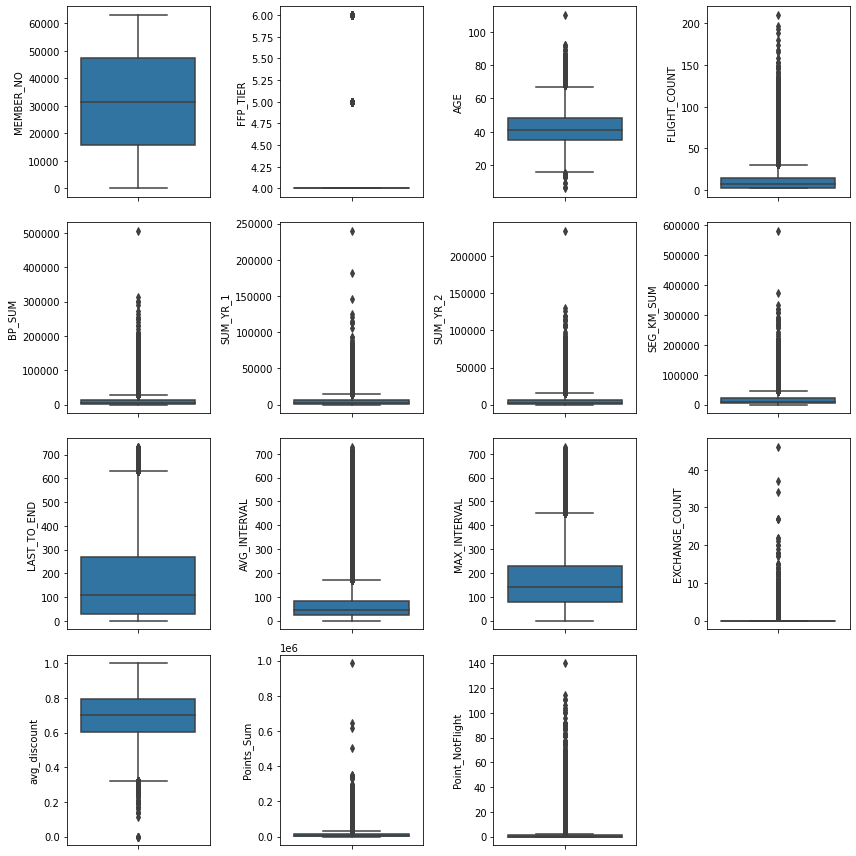

In [ ]:
plt.figure(figsize = (12,12))
for i in range(0, len(nums)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = df[nums[i]], orient='v')
    plt.tight_layout()

###Correlation

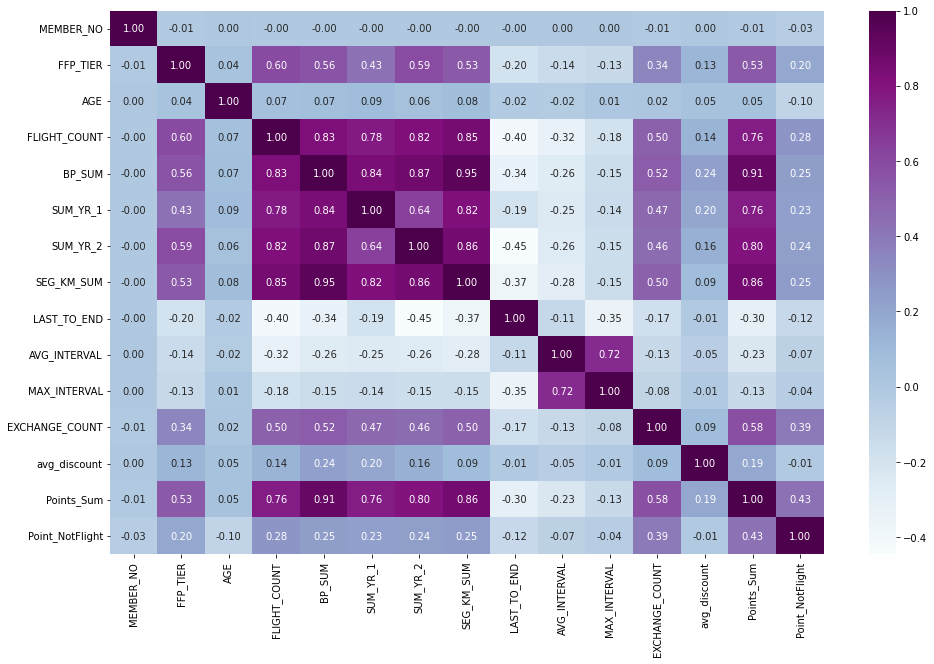

In [ ]:
corr_= df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")


Largest correlation
*   Point_sum
*   BP_SUM
*   SUM_YR2
*   SUM_YR1
*   FLIGHT_COUNTS
*   SEG_KM_SUM


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          60041 non-null  int64  
 1   FFP_DATE           60041 non-null  object 
 2   FIRST_FLIGHT_DATE  60041 non-null  object 
 3   FFP_TIER           60041 non-null  int64  
 4   AGE                60041 non-null  float64
 5   LOAD_TIME          60041 non-null  object 
 6   FLIGHT_COUNT       60041 non-null  int64  
 7   BP_SUM             60041 non-null  int64  
 8   SUM_YR_1           60041 non-null  float64
 9   SUM_YR_2           60041 non-null  float64
 10  SEG_KM_SUM         60041 non-null  int64  
 11  LAST_FLIGHT_DATE   60041 non-null  object 
 12  LAST_TO_END        60041 non-null  int64  
 13  AVG_INTERVAL       60041 non-null  float64
 14  MAX_INTERVAL       60041 non-null  int64  
 15  EXCHANGE_COUNT     60041 non-null  int64  
 16  avg_discount       600

In [ ]:
df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00', '2014/2/28  0:00:00')

df["FFP_DATE"] = pd.to_datetime(df["FFP_DATE"])
df["LOAD_TIME"] = pd.to_datetime(df["LOAD_TIME"])
df["FIRST_FLIGHT_DATE"] = pd.to_datetime(df["FIRST_FLIGHT_DATE"])
df["LAST_FLIGHT_DATE"] = pd.to_datetime(df["LAST_FLIGHT_DATE"])
df["FFP_DATE"] = df["FFP_DATE"].values.astype('datetime64[ns]')
df["LOAD_TIME"] = df["LOAD_TIME"].values.astype('datetime64[ns]')
df["FIRST_FLIGHT_DATE"] = df["FIRST_FLIGHT_DATE"].values.astype('datetime64[ns]')
df["LAST_FLIGHT_DATE"] = df["LAST_FLIGHT_DATE"].values.astype('datetime64[ns]')

##Feature Selection

Features with low correlation values and unrelated to the data will be dropped from the dataset

In [ ]:
df_dropped = df.drop(['MEMBER_NO','SUM_YR_1','SUM_YR_2','AGE','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','Point_NotFlight'], axis = 1)

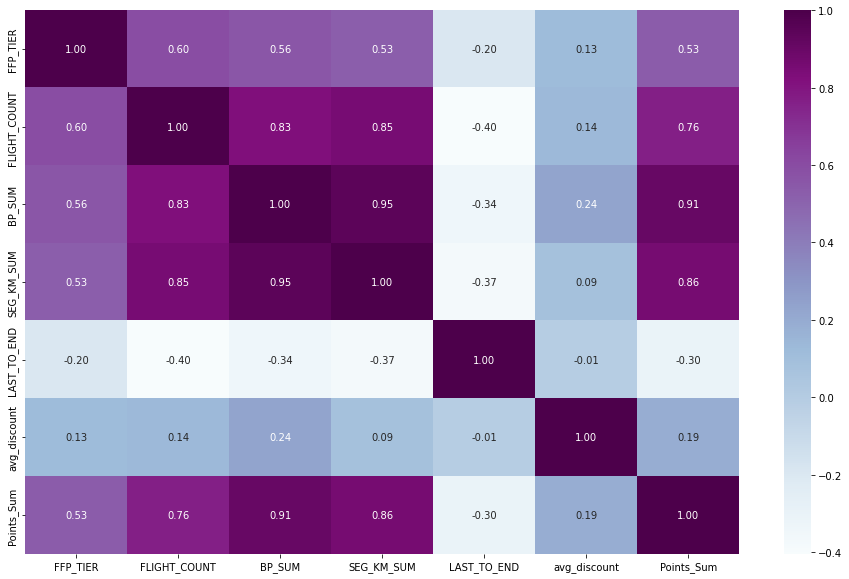

In [ ]:
corr_= df_dropped.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

BP_SUM, SEG_KM_SUM, Points_Sum have highest correlation, choose one to avoid collinearity. SEG_KM_SUM chosen because has the largest correlation with outher feature 

In [ ]:
df_dropped = df_dropped.drop(['BP_SUM','Points_Sum'], axis = 1)

In [ ]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           60041 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  60041 non-null  datetime64[ns]
 2   FFP_TIER           60041 non-null  int64         
 3   LOAD_TIME          60041 non-null  datetime64[ns]
 4   FLIGHT_COUNT       60041 non-null  int64         
 5   SEG_KM_SUM         60041 non-null  int64         
 6   LAST_FLIGHT_DATE   60041 non-null  datetime64[ns]
 7   LAST_TO_END        60041 non-null  int64         
 8   avg_discount       60041 non-null  float64       
dtypes: datetime64[ns](4), float64(1), int64(4)
memory usage: 4.6 MB


In [ ]:
import numpy as np

df_dropped['Meet_Time'] = (df_dropped['LOAD_TIME'] - df_dropped['FFP_DATE'])/np.timedelta64(1,'M')

In [ ]:
df_dropped['Flight_Year']= df_dropped['FLIGHT_COUNT']/ ((df_dropped['LAST_FLIGHT_DATE'] - df_dropped['FIRST_FLIGHT_DATE'])/np.timedelta64(1,'Y'))

In [ ]:
df_dropped = df_dropped.drop(['FFP_DATE','FIRST_FLIGHT_DATE','LAST_FLIGHT_DATE','LOAD_TIME','FLIGHT_COUNT'], axis = 1)

In [ ]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FFP_TIER      60041 non-null  int64  
 1   SEG_KM_SUM    60041 non-null  int64  
 2   LAST_TO_END   60041 non-null  int64  
 3   avg_discount  60041 non-null  float64
 4   Meet_Time     60041 non-null  float64
 5   Flight_Year   60041 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 3.2 MB


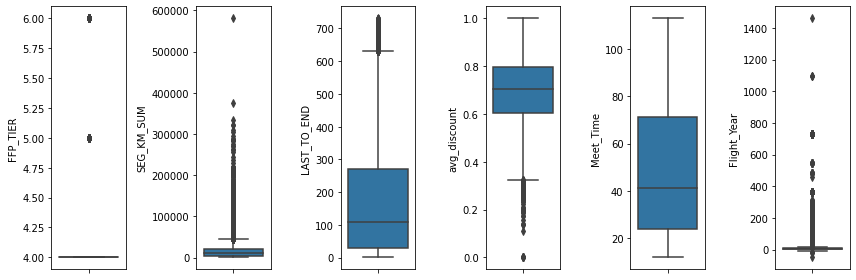

In [ ]:
#Handle Outliers
numeric=['FFP_TIER','SEG_KM_SUM','LAST_TO_END','avg_discount','Meet_Time','Flight_Year']
plt.figure(figsize = (12,4))
for i in range(0, len(numeric)):
    plt.subplot(1, 6, i+1)
    sns.boxplot(y = df_dropped[numeric[i]])
    plt.tight_layout()

In [ ]:
df_dropped.describe()

,FFP_TIER,SEG_KM_SUM,LAST_TO_END,avg_discount,Meet_Time,Flight_Year
count,60041.000000,60041.000000,60041.000000,60041.000000,60041.000000,6.004100e+04
mean,4.081727,16772.027931,177.260855,0.695875,48.451460,inf
std,0.328371,20335.635374,184.117824,0.144030,27.708205,NaN
min,4.000000,368.000000,1.000000,0.000000,11.992033,-4.832439e+01
25%,4.000000,4713.000000,30.000000,0.605626,23.918356,1.669680e+00
50%,4.000000,9878.000000,109.000000,0.703390,41.298589,3.934390e+00
75%,4.000000,20893.000000,270.000000,0.794527,71.196534,8.696250e+00
max,6.000000,580717.000000,731.000000,1.000000,112.922237,inf


All columns are considered reasonable even though there are outliers, but the number of flights per year seems to have to be handled.

In [ ]:
df_dropped =df_dropped[~df_dropped.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
#will drop outliers which is 3 times IQR, because 1.5 times IQR is too little.

fil_ent = np.array([True] * len(df_dropped))
for col in ['Flight_Year']:
    Q1 = df_dropped[col].quantile(0.25)
    Q3 = df_dropped[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 3)
    high_limit = Q3 + (IQR * 3)

    fil_ent = ((df_dropped[col] >= low_limit) & (df_dropped[col] <= high_limit)) & fil_ent
    
df_dropped = df_dropped[fil_ent].reset_index()

len(df_dropped)

55883

In [ ]:
df_dropped.describe()

,index,FFP_TIER,SEG_KM_SUM,LAST_TO_END,avg_discount,Meet_Time,Flight_Year
count,55883.000000,55883.000000,55883.000000,55883.000000,55883.000000,55883.000000,55883.000000
mean,31032.565825,4.080525,17212.286491,162.791851,0.698392,50.027501,5.357275
std,17638.888220,0.324920,19926.554074,172.021243,0.139988,27.629004,5.334105
min,5.000000,4.000000,368.000000,1.000000,0.000000,11.992033,-13.303535
25%,15936.000000,4.000000,5189.000000,28.000000,0.610385,25.823939,1.554223
50%,30738.000000,4.000000,10549.000000,101.000000,0.705012,43.959835,3.531855
75%,45964.500000,4.000000,21604.500000,241.000000,0.793761,72.560011,7.281512
max,62985.000000,6.000000,375074.000000,730.000000,1.000000,112.922237,29.326040


###Standardization and Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
feature = ['FFP_TIER','SEG_KM_SUM','LAST_TO_END','avg_discount','Meet_Time','Flight_Year']
X = df_dropped[feature].values
X_std = StandardScaler().fit_transform(X)
dfs = pd.DataFrame(data=X_std, columns=feature)

In [ ]:
dfs.head()

,FFP_TIER,SEG_KM_SUM,LAST_TO_END,avg_discount,Meet_Time,Flight_Year
0,5.907580,13.919878,-0.487106,1.923755,0.854193,3.015799
1,5.907580,13.541334,-0.940543,1.906997,1.674710,1.360846
2,5.907580,13.550769,-0.928916,1.883592,-0.084050,2.442943
3,2.829873,15.270048,-0.911476,0.929274,-0.588252,2.834012
4,5.907580,17.959197,-0.859157,0.068707,-0.187507,2.239404


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc_data = StandardScaler()
df_std = sc_data.fit_transform(dfs.astype(float))

In [ ]:
df_std

array([[ 5.90758024, 13.91987768, -0.48710612,  1.92375514,  0.85419313,
         3.01579935],
       [ 5.90758024, 13.54133418, -0.94054255,  1.9069968 ,  1.67471033,
         1.3608461 ],
       [ 5.90758024, 13.55076891, -0.92891598,  1.88359236, -0.08405045,
         2.44294274],
       ...,
       [-0.24783353, -0.75549546,  0.08840934, -4.98898435, -0.79992197,
        -0.80116675],
       [-0.24783353, -0.46151325, -0.42897325, -4.98898435, -0.04599748,
         1.46316717],
       [-0.24783353, -0.73361492, -0.7777705 , -4.98898435,  1.66519708,
        -0.95263546]])

##Modelling

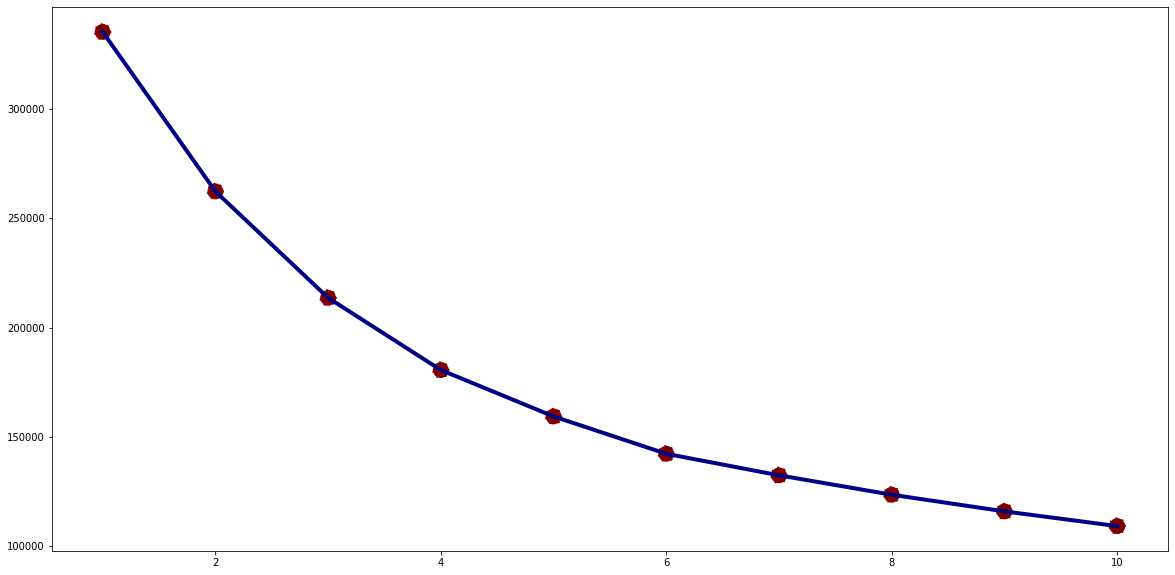

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(df_std)

In [ ]:
df_data_std = pd.DataFrame(data=df_std, columns=list(dfs))

In [ ]:
df_data_std['clusters'] = kmeans.labels_
df_dropped['clusters'] = kmeans.labels_

In [ ]:
dfs.head()

,FFP_TIER,SEG_KM_SUM,LAST_TO_END,avg_discount,Meet_Time,Flight_Year
0,5.907580,13.919878,-0.487106,1.923755,0.854193,3.015799
1,5.907580,13.541334,-0.940543,1.906997,1.674710,1.360846
2,5.907580,13.550769,-0.928916,1.883592,-0.084050,2.442943
3,2.829873,15.270048,-0.911476,0.929274,-0.588252,2.834012
4,5.907580,17.959197,-0.859157,0.068707,-0.187507,2.239404


In [ ]:
display(df_dropped.groupby('clusters').agg(['mean','median']))

index           FFP_TIER           SEG_KM_SUM           \
                  mean   median      mean median          mean   median   
clusters                                                                  
0         29943.472302  28715.0  4.001599    4.0  16097.952246  11772.0   
1         29165.071797  27664.0  4.002426    4.0  16706.744709  12114.5   
2         45139.589926  47536.0  4.001538    4.0   6129.582044   4574.0   
3          7094.329903   3911.0  5.224200    5.0  58984.892629  50854.0   

         LAST_TO_END        avg_discount            Meet_Time             \
                mean median         mean    median       mean     median   
clusters                                                                   
0         107.308427   79.0     0.680202  0.688594  27.104427  24.936857   
1          94.697842   72.0     0.697932  0.703143  75.256094  74.810571   
2         456.384120  447.0     0.714648  0.725000  48.343690  42.678494   
3          27.604172   12.0     0.767737  0.763938  62.477917  63.475636   

         Flight_Year            
                mean    median  
clusters                        
0           7.872241  6.440044  
1           2.340385  1.774039  
2           3.613595  1.948999  
3          10.913414  9.235332

##Visualization

Using PCA to make it 2D 

In [ ]:
X = df_data_std.drop(['clusters'], axis = 1)
Y = df_data_std['clusters']

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=6)
pca.fit(X)
pcs = pca.transform(X)

pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])
pdf['clusters'] = Y
pdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,clusters
0,13.377959,-2.060971,-1.339592,3.574038,3.586837,5.636865,3
1,12.622162,-3.656496,-1.062698,3.155180,3.010812,5.882740,3
2,13.069140,-1.676503,-1.108380,2.984801,2.772610,6.121330,3
3,12.502601,-0.728989,0.238788,2.297687,5.619814,7.582177,3
4,15.396717,-2.139292,0.818265,4.365229,4.605220,8.980921,3


In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
pcs = pca.transform(X)

X_std_pca = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])
X_std_pca['clusters'] = Y
X_std_pca.head()

,pc1,pc2,clusters
0,13.377959,-2.060971,3
1,12.622162,-3.656496,3
2,13.069140,-1.676503,3
3,12.502601,-0.728989,3
4,15.396717,-2.139292,3


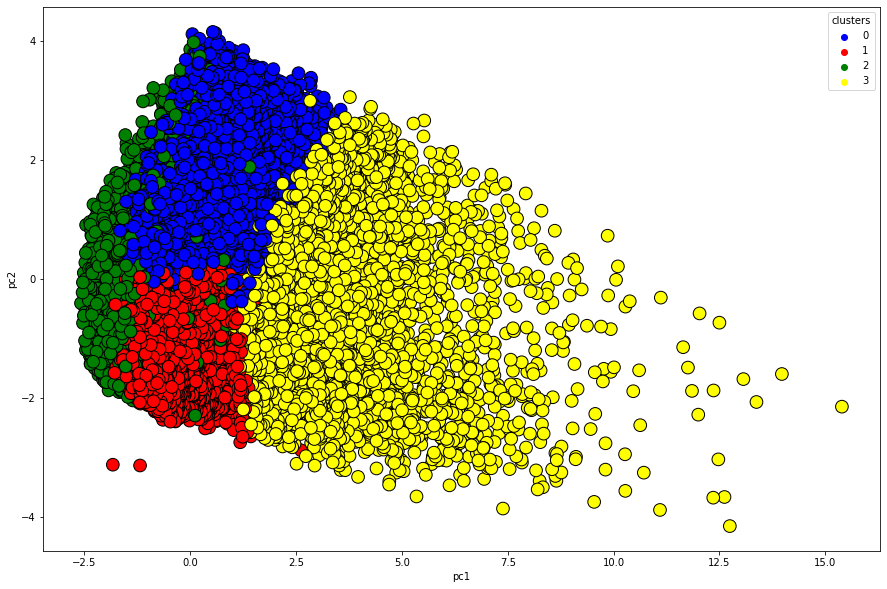

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="pc1", y="pc2",
    hue="clusters",
    edgecolor='black',
    data=X_std_pca,
    palette=['blue','red','green','yellow'],
    s=160,
    ax=ax
)

##Interpretation and Insight

Check this slide:

[Interpretation and Insight of Airline Customer Value Analysis](https://docs.google.com/presentation/d/1VYRhVpOXR0M9SDXv-jZ1vo3xIw_5b1B0/edit?usp=sharing&ouid=108103157320603704452&rtpof=true&sd=true)